In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.cuda
import torch.optim as optim
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from SHG import SHG
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
from tqdm.notebook import tqdm
from PIL import Image
from utils import *

In [2]:
#DIR_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/models/Thu_Apr__8_08-06-21_2021/"
#DIR_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/models/Thu_Apr__1_20-36-35_2021/"
DIR_PATH = "C:/Users/André/OneDrive 2/OneDrive/Skrivebord/bsc_data/models/Mon_Apr_12_18-11-59_2021/"
val_loss = np.load(DIR_PATH + "val_loss.npy")
train_loss = np.load(DIR_PATH + "loss.npy")
val_acc = np.load(DIR_PATH + "val_acc.npy")

In [3]:
print("argmin val loss:", np.argmin(val_loss))
print("min val loss:", val_loss[np.argmin(val_loss)])
print("argmin train loss:", np.argmin(train_loss))
print("min train loss:", train_loss[np.argmin(train_loss)])
print("argmax val acc:", np.argmax(val_acc))
print("max val acc:", val_acc[np.argmax(val_acc)])
print("min val loss acc:", val_acc[np.argmin(val_loss)])

argmin val loss: 31
min val loss: 5.1540812623652936e-05
argmin train loss: 49
min train loss: 4.1143955896409216e-05
argmax val acc: 46
max val acc: 0.4330409899757549
min val loss acc: 0.4209546301074728


In [4]:
print(len(val_acc))
print(len(val_loss))

50
50


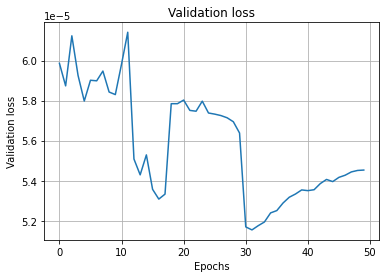

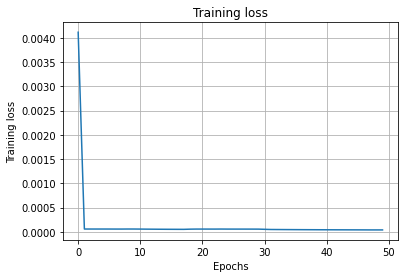

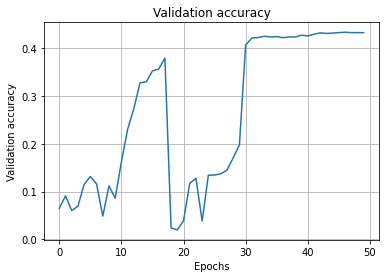

In [5]:
n = 2
plt.plot(val_loss)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()
plt.plot(train_loss)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.title("Training loss")
plt.show()
plt.plot(val_acc)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy")
plt.show()

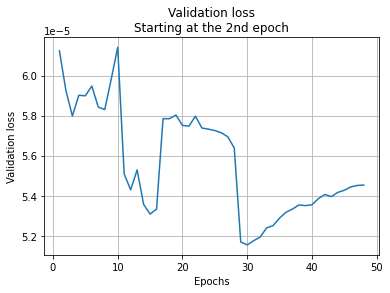

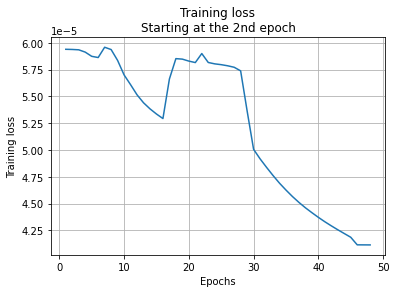

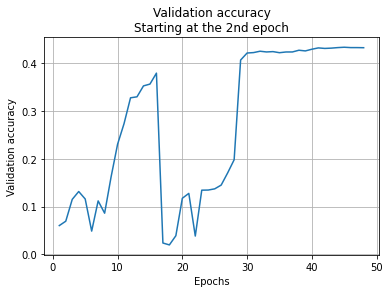

In [6]:
n = 2
plt.plot(np.arange(n - 1, len(val_loss[n:]) + 1,  1), val_loss[n:])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.title("Validation loss\nStarting at the 2nd epoch")
plt.show()
plt.plot(np.arange(n - 1, len(train_loss[n:]) + 1, 1), train_loss[n:])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.title("Training loss\nStarting at the 2nd epoch")
plt.show()
plt.plot(np.arange(n - 1, len(val_acc[n:])  + 1, 1), val_acc[n:])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Validation accuracy")
plt.title("Validation accuracy\nStarting at the 2nd epoch")
plt.show()

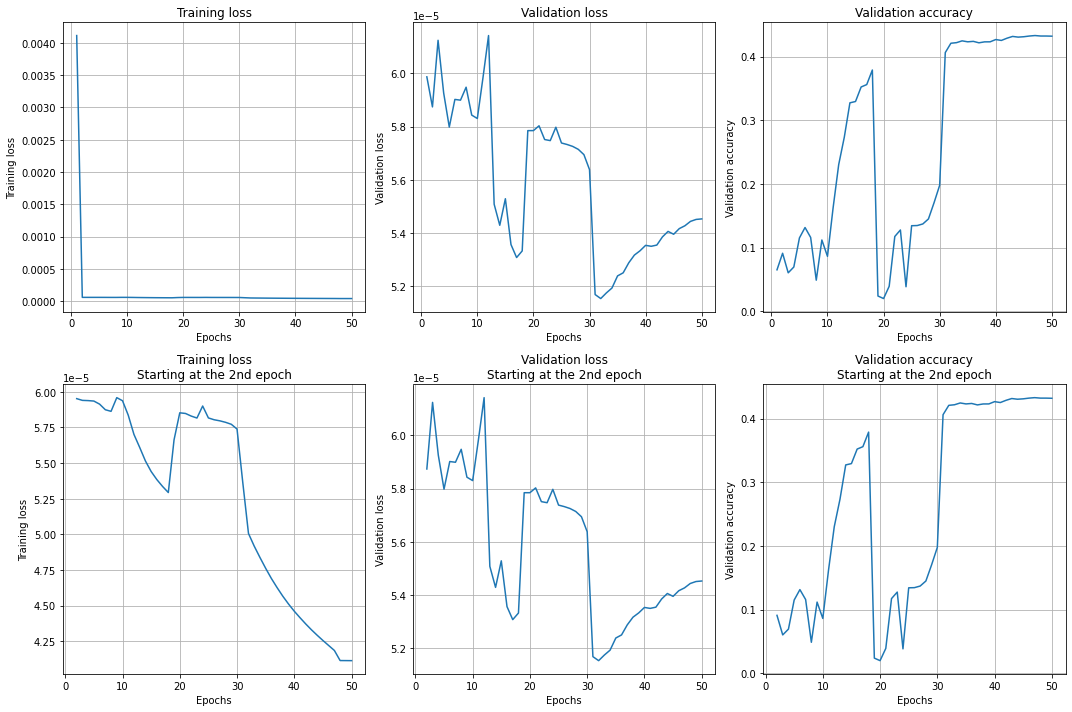

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

n = 1

axs[0, 0].plot(np.arange(1, len(train_loss) + 1), train_loss)
axs[0, 0].grid()
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Training loss")
axs[0, 0].set_title("Training loss")

axs[0, 1].plot(np.arange(1, len(val_loss) + 1), val_loss)
axs[0, 1].grid()
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Validation loss")
axs[0, 1].set_title("Validation loss")

axs[0, 2].plot(np.arange(1, len(val_acc) + 1), val_acc)
axs[0, 2].grid()
axs[0, 2].set_xlabel("Epochs")
axs[0, 2].set_ylabel("Validation accuracy")
axs[0, 2].set_title("Validation accuracy")

axs[1, 0].plot(np.arange(n + 1, len(train_loss) + 1, 1), train_loss[n:])
axs[1, 0].grid()
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Training loss")
axs[1, 0].set_title("Training loss\nStarting at the 2nd epoch")

axs[1, 1].plot(np.arange(n + 1, len(val_loss) + 1, 1), val_loss[n:])
axs[1, 1].grid()
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Validation loss")
axs[1, 1].set_title("Validation loss\nStarting at the 2nd epoch")

axs[1, 2].plot(np.arange(n + 1, len(val_acc) + 1, 1), val_acc[n:])
axs[1, 2].grid()
axs[1, 2].set_xlabel("Epochs")
axs[1, 2].set_ylabel("Validation accuracy")
axs[1, 2].set_title("Validation accuracy\nStarting at the 2nd epoch")

plt.tight_layout()
plt.savefig("C:/Users/André/OneDrive 2/OneDrive/Skrivebord/results.png")
plt.show()